In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score ,confusion_matrix , classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_scoreN(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        pred = (pred > 0.5)
        fpr, tpr, _ = metrics.roc_curve(y_train, pred)
        auc_score = metrics.auc(fpr, tpr)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tAUC score: {auc_score * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        print(classification_report(y_train,pred, digits = 3))
        
    elif train==False:
        pred = clf.predict(X_test)
        pred = (pred > 0.5)
        fpr, tpr, _ = metrics.roc_curve(y_test, pred)
        auc_score = metrics.auc(fpr, tpr)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tAUC score: {auc_score * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        fpr, tpr, _ = metrics.roc_curve(y_train, pred)
        auc_score = metrics.auc(fpr, tpr)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tAUC score: {auc_score * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        print(classification_report(y_train,pred, digits = 3))
        
    elif train==False:
        pred = clf.predict(X_test)
        fpr, tpr, _ = metrics.roc_curve(y_test, pred)
        auc_score = metrics.auc(fpr, tpr)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tAUC score: {auc_score * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        print(classification_report(y_test,pred, digits = 3))

In [4]:
data = pd.read_csv('train_LZdllcl (2).csv')

In [5]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [6]:
data.head(100)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,43923,Analytics,region_14,Bachelor's,m,sourcing,1,31,4.0,4,1,0,86,0
96,64109,Technology,region_26,Bachelor's,f,sourcing,1,23,NaN,1,0,0,77,0
97,41983,Operations,region_2,Bachelor's,f,sourcing,1,33,3.0,5,0,0,57,0
98,21440,Sales & Marketing,region_31,Bachelor's,m,other,1,41,3.0,12,1,0,52,0


In [7]:
data.isnull().values.any()

True

In [8]:
categorical_col = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {data[column].unique()}")
        print("--------------------------------")

department : ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
--------------------------------
region : ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
--------------------------------
education : ["Master's & above" "Bachelor's" nan 'Below Secondary']
--------------------------------
gender : ['f' 'm']
--------------------------------
recruitment_channel : ['sourcing' 'other' 'referred']
--------------------------------


In [9]:
data.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

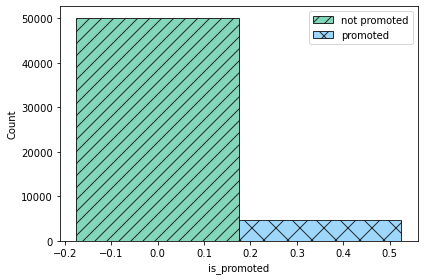

In [10]:
# col=['mediumaquamarine', 'lightskyblue']
# sb.set_palette(col)
# sb.countplot('is_promoted', data=data, hatch=["//","x"],edgecolor='black',)
# plt.show()
label1=data[data["is_promoted"]==0]
label2=data[data["is_promoted"]==1]

n_groups = 1
means_frank = label1['is_promoted'].value_counts()
means_guido = label2['is_promoted'].value_counts()

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='mediumaquamarine',
hatch="//",
edgecolor='black',
label='not promoted')

rects2 = plt.bar(index + bar_width , means_guido, bar_width, 
alpha=opacity,
color='lightskyblue',
hatch="x",
edgecolor='black',
label='promoted')

plt.xlabel('is_promoted')
plt.ylabel('Count')
#plt.title('no_of_trainings')
plt.legend()


plt.tight_layout()
plt.show()

In [11]:
#using one hot encoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
  
#encode department column
enc = OneHotEncoder(sparse=False)
cols_to_convert = ['department'] # specify the list of columns here
department_col = pd.get_dummies(data['department'], prefix='department')
data['department'] = enc.fit_transform(data.loc[:,cols_to_convert])
data = data.join(department_col,how="right") #Join the new columns
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology
0,65438,0.0,region_7,Master's & above,f,sourcing,1,35,5.0,8,...,0,0,0,0,0,0,0,0,1,0
1,65141,0.0,region_22,Bachelor's,m,other,1,30,5.0,4,...,0,0,0,0,0,1,0,0,0,0
2,7513,0.0,region_19,Bachelor's,m,sourcing,1,34,3.0,7,...,0,0,0,0,0,0,0,0,1,0
3,2542,0.0,region_23,Bachelor's,m,other,2,39,1.0,10,...,0,0,0,0,0,0,0,0,1,0
4,48945,0.0,region_26,Bachelor's,m,other,1,45,3.0,2,...,0,0,0,0,0,0,0,0,0,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   employee_id                   54808 non-null  int64  
 1   department                    54808 non-null  float64
 2   region                        54808 non-null  object 
 3   education                     52399 non-null  object 
 4   gender                        54808 non-null  object 
 5   recruitment_channel           54808 non-null  object 
 6   no_of_trainings               54808 non-null  int64  
 7   age                           54808 non-null  int64  
 8   previous_year_rating          50684 non-null  float64
 9   length_of_service             54808 non-null  int64  
 10  KPIs_met >80%                 54808 non-null  int64  
 11  awards_won?                   54808 non-null  int64  
 12  avg_training_score            54808 non-null  int64  
 13  i

In [13]:
data.dropna(inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 0 to 54807
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   employee_id                   48660 non-null  int64  
 1   department                    48660 non-null  float64
 2   region                        48660 non-null  object 
 3   education                     48660 non-null  object 
 4   gender                        48660 non-null  object 
 5   recruitment_channel           48660 non-null  object 
 6   no_of_trainings               48660 non-null  int64  
 7   age                           48660 non-null  int64  
 8   previous_year_rating          48660 non-null  float64
 9   length_of_service             48660 non-null  int64  
 10  KPIs_met >80%                 48660 non-null  int64  
 11  awards_won?                   48660 non-null  int64  
 12  avg_training_score            48660 non-null  int64  
 13  i

In [15]:
data.is_promoted.value_counts()

0    44428
1     4232
Name: is_promoted, dtype: int64

In [16]:
4668/54807

0.08517160216760633

In [17]:
#encode education column
enc = OneHotEncoder(sparse=False)
cols_to_convert = ['education'] # specify the list of columns here
education_col = pd.get_dummies(data['education'], prefix='education')
data['education'] = enc.fit_transform(data.loc[:,cols_to_convert])
data = data.join(education_col,how="right") #Join the new columns
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above
0,65438,0.0,region_7,0.0,f,sourcing,1,35,5.0,8,...,0,0,0,0,0,1,0,0,0,1
1,65141,0.0,region_22,1.0,m,other,1,30,5.0,4,...,0,0,1,0,0,0,0,1,0,0
2,7513,0.0,region_19,1.0,m,sourcing,1,34,3.0,7,...,0,0,0,0,0,1,0,1,0,0
3,2542,0.0,region_23,1.0,m,other,2,39,1.0,10,...,0,0,0,0,0,1,0,1,0,0
4,48945,0.0,region_26,1.0,m,other,1,45,3.0,2,...,0,0,0,0,0,0,1,1,0,0


In [18]:
#encode recruitment_channel column
enc = OneHotEncoder(sparse=False)
cols_to_convert = ['recruitment_channel'] # specify the list of columns here
recruitment_channel_col = pd.get_dummies(data['recruitment_channel'], prefix='recruitment_channel')
data['recruitment_channel'] = enc.fit_transform(data.loc[:,cols_to_convert])
data = data.join(recruitment_channel_col,how="right") #Join the new columns
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,0.0,region_7,0.0,f,0.0,1,35,5.0,8,...,0,0,1,0,0,0,1,0,0,1
1,65141,0.0,region_22,1.0,m,1.0,1,30,5.0,4,...,0,0,0,0,1,0,0,1,0,0
2,7513,0.0,region_19,1.0,m,0.0,1,34,3.0,7,...,0,0,1,0,1,0,0,0,0,1
3,2542,0.0,region_23,1.0,m,1.0,2,39,1.0,10,...,0,0,1,0,1,0,0,1,0,0
4,48945,0.0,region_26,1.0,m,1.0,1,45,3.0,2,...,0,0,0,1,1,0,0,1,0,0


In [19]:
data.shape

(48660, 29)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 0 to 54807
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   employee_id                   48660 non-null  int64  
 1   department                    48660 non-null  float64
 2   region                        48660 non-null  object 
 3   education                     48660 non-null  float64
 4   gender                        48660 non-null  object 
 5   recruitment_channel           48660 non-null  float64
 6   no_of_trainings               48660 non-null  int64  
 7   age                           48660 non-null  int64  
 8   previous_year_rating          48660 non-null  float64
 9   length_of_service             48660 non-null  int64  
 10  KPIs_met >80%                 48660 non-null  int64  
 11  awards_won?                   48660 non-null  int64  
 12  avg_training_score            48660 non-null  int64  
 13  i

In [21]:
data.isnull().sum()

employee_id                     0
department                      0
region                          0
education                       0
gender                          0
recruitment_channel             0
no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
KPIs_met >80%                   0
awards_won?                     0
avg_training_score              0
is_promoted                     0
department_Analytics            0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_R&D                  0
department_Sales & Marketing    0
department_Technology           0
education_Bachelor's            0
education_Below Secondary       0
education_Master's & above      0
recruitment_channel_other       0
recruitment_channel_referred    0
recruitment_channel_sourcing    0
dtype: int64

In [22]:
data.previous_year_rating.value_counts()

3.0    17867
5.0    11362
4.0     9509
1.0     5887
2.0     4035
Name: previous_year_rating, dtype: int64

In [23]:
#data['previous_year_rating'] = data['previous_year_rating'].replace(np.nan,0) 

In [24]:
len(data)

48660

In [25]:
categorical_col = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {data[column].unique()}")
        print("--------------------------------")

region : ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_32' 'region_6' 'region_33' 'region_8'
 'region_24' 'region_3' 'region_9' 'region_18']
--------------------------------
gender : ['f' 'm']
--------------------------------


In [26]:
data.head(50)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,0.0,region_7,0.0,f,0.0,1,35,5.0,8,...,0,0,1,0,0,0,1,0,0,1
1,65141,0.0,region_22,1.0,m,1.0,1,30,5.0,4,...,0,0,0,0,1,0,0,1,0,0
2,7513,0.0,region_19,1.0,m,0.0,1,34,3.0,7,...,0,0,1,0,1,0,0,0,0,1
3,2542,0.0,region_23,1.0,m,1.0,2,39,1.0,10,...,0,0,1,0,1,0,0,1,0,0
4,48945,0.0,region_26,1.0,m,1.0,1,45,3.0,2,...,0,0,0,1,1,0,0,1,0,0
5,58896,1.0,region_2,1.0,m,0.0,2,31,3.0,7,...,0,0,0,0,1,0,0,0,0,1
6,20379,0.0,region_20,1.0,f,1.0,1,31,3.0,5,...,0,0,0,0,1,0,0,1,0,0
7,16290,0.0,region_34,0.0,m,0.0,1,33,3.0,6,...,0,0,0,0,0,0,1,0,0,1
8,73202,1.0,region_20,1.0,m,1.0,1,28,4.0,5,...,0,0,0,0,1,0,0,1,0,0
9,28911,0.0,region_1,0.0,m,0.0,1,32,5.0,5,...,0,0,1,0,0,0,1,0,0,1


# split The data

In [27]:
df = pd.DataFrame(data)

In [28]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,0.0,region_7,0.0,f,0.0,1,35,5.0,8,...,0,0,1,0,0,0,1,0,0,1
1,65141,0.0,region_22,1.0,m,1.0,1,30,5.0,4,...,0,0,0,0,1,0,0,1,0,0
2,7513,0.0,region_19,1.0,m,0.0,1,34,3.0,7,...,0,0,1,0,1,0,0,0,0,1
3,2542,0.0,region_23,1.0,m,1.0,2,39,1.0,10,...,0,0,1,0,1,0,0,1,0,0
4,48945,0.0,region_26,1.0,m,1.0,1,45,3.0,2,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,6915,0.0,region_14,1.0,m,1.0,2,31,1.0,2,...,0,0,1,0,1,0,0,1,0,0
54803,3030,0.0,region_14,1.0,m,0.0,1,48,3.0,17,...,0,0,0,1,1,0,0,0,0,1
54804,74592,0.0,region_27,0.0,f,1.0,1,37,2.0,6,...,0,0,0,0,0,0,1,1,0,0
54805,13918,1.0,region_1,1.0,m,1.0,1,27,5.0,3,...,0,0,0,0,1,0,0,1,0,0


In [266]:
s0 = df.is_promoted[df.is_promoted.eq(0)].sample(200).index
s1 = df.is_promoted[df.is_promoted.eq(1)].sample(200).index 

In [267]:
test = df.loc[s0.union(s1)]

In [268]:
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
71,24040,0.0,region_22,0.0,m,1.0,1,34,5.0,7,...,0,0,0,1,0,0,1,1,0,0
351,8284,0.0,region_2,1.0,f,1.0,1,34,5.0,5,...,0,0,1,0,1,0,0,1,0,0
502,44381,0.0,region_7,1.0,m,1.0,1,33,5.0,8,...,0,0,0,0,1,0,0,1,0,0
557,28850,0.0,region_14,0.0,f,0.0,1,36,3.0,5,...,0,0,0,1,0,0,1,0,0,1
618,9072,0.0,region_14,0.0,m,1.0,1,33,4.0,3,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54259,7652,0.0,region_2,1.0,f,1.0,1,48,3.0,16,...,1,0,0,0,1,0,0,1,0,0
54310,31961,1.0,region_29,1.0,m,0.0,1,29,3.0,2,...,0,0,0,0,1,0,0,0,0,1
54404,40891,0.0,region_27,1.0,m,0.0,1,30,5.0,5,...,0,0,1,0,1,0,0,0,0,1
54649,26846,0.0,region_22,1.0,m,1.0,1,27,3.0,2,...,0,0,0,1,1,0,0,1,0,0


In [269]:
train = pd.concat([df, test, test]).drop_duplicates(keep=False)

In [270]:
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,0.0,region_7,0.0,f,0.0,1,35,5.0,8,...,0,0,1,0,0,0,1,0,0,1
1,65141,0.0,region_22,1.0,m,1.0,1,30,5.0,4,...,0,0,0,0,1,0,0,1,0,0
2,7513,0.0,region_19,1.0,m,0.0,1,34,3.0,7,...,0,0,1,0,1,0,0,0,0,1
3,2542,0.0,region_23,1.0,m,1.0,2,39,1.0,10,...,0,0,1,0,1,0,0,1,0,0
4,48945,0.0,region_26,1.0,m,1.0,1,45,3.0,2,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,6915,0.0,region_14,1.0,m,1.0,2,31,1.0,2,...,0,0,1,0,1,0,0,1,0,0
54803,3030,0.0,region_14,1.0,m,0.0,1,48,3.0,17,...,0,0,0,1,1,0,0,0,0,1
54804,74592,0.0,region_27,0.0,f,1.0,1,37,2.0,6,...,0,0,0,0,0,0,1,1,0,0
54805,13918,1.0,region_1,1.0,m,1.0,1,27,5.0,3,...,0,0,0,0,1,0,0,1,0,0


In [271]:
train.is_promoted.value_counts()

0    44228
1     4032
Name: is_promoted, dtype: int64

In [272]:
test.is_promoted.value_counts()

1    200
0    200
Name: is_promoted, dtype: int64

In [203]:
48660 * 20/100

9732.0

In [204]:
9732 * 40/100

3892.8

In [205]:
9732 * 60/100

5839.2

In [206]:
data.is_promoted.value_counts()

0    44428
1     4232
Name: is_promoted, dtype: int64

# select data

In [273]:
X = data.iloc[:,[2,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23, 24, 25, 26,27,28]]
Y = data.iloc[:,13]
print(X.shape) 
print(Y.shape)

(48660, 24)
(48660,)


In [274]:
X_train = train.iloc[:,[2,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23, 24, 25, 26,27,28]]
Y_train = train.iloc[:,13]
print(X_train.shape) 
print(Y_train.shape)

(48260, 24)
(48260,)


In [275]:
X_test = test.iloc[:,[2,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23, 24, 25, 26,27,28]]
Y_test = test.iloc[:,13]
print(X_test.shape) 
print(Y_test.shape)

(400, 24)
(400,)


In [210]:
#X = data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12]]
#Y = data.iloc[:,-1]
#print(X.shape)
#print(Y.shape)

In [211]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'department_Analytics',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'education_Bachelor's', 'education_Below Secondary',
       'education_Master's & above', 'recruitment_channel_other',
       'recruitment_channel_referred', 'recruitment_channel_sourcing'],
      dtype='object')

In [212]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,0.0,region_7,0.0,f,0.0,1,35,5.0,8,...,0,0,1,0,0,0,1,0,0,1
1,65141,0.0,region_22,1.0,m,1.0,1,30,5.0,4,...,0,0,0,0,1,0,0,1,0,0
2,7513,0.0,region_19,1.0,m,0.0,1,34,3.0,7,...,0,0,1,0,1,0,0,0,0,1
3,2542,0.0,region_23,1.0,m,1.0,2,39,1.0,10,...,0,0,1,0,1,0,0,1,0,0
4,48945,0.0,region_26,1.0,m,1.0,1,45,3.0,2,...,0,0,0,1,1,0,0,1,0,0


In [213]:
#label encoder

In [276]:
from sklearn.preprocessing import LabelEncoder
# encoder lables 
enc= LabelEncoder()
X.iloc[:,[0,1]]= \
X.iloc[:,[0,1]].apply(enc.fit_transform)

In [277]:
from sklearn.preprocessing import LabelEncoder
# encoder lables 
enc= LabelEncoder()
X_train.iloc[:,[0,1]]= \
X_train.iloc[:,[0,1]].apply(enc.fit_transform)

In [278]:
from sklearn.preprocessing import LabelEncoder
# encoder lables 
enc= LabelEncoder()
X_test.iloc[:,[0,1]]= \
X_test.iloc[:,[0,1]].apply(enc.fit_transform)

In [279]:
X_train.head(20)

,region,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,...,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,31,0,1,35,5.0,8,1,0,49,0,...,0,0,1,0,0,0,1,0,0,1
1,14,1,1,30,5.0,4,0,0,60,0,...,0,0,0,0,1,0,0,1,0,0
2,10,1,1,34,3.0,7,0,0,50,0,...,0,0,1,0,1,0,0,0,0,1
3,15,1,2,39,1.0,10,0,0,50,0,...,0,0,1,0,1,0,0,1,0,0
4,18,1,1,45,3.0,2,0,0,73,0,...,0,0,0,1,1,0,0,1,0,0
5,11,1,2,31,3.0,7,0,0,85,1,...,0,0,0,0,1,0,0,0,0,1
6,12,0,1,31,3.0,5,0,0,59,0,...,0,0,0,0,1,0,0,1,0,0
7,27,1,1,33,3.0,6,0,0,63,0,...,0,0,0,0,0,0,1,0,0,1
8,12,1,1,28,4.0,5,0,0,83,1,...,0,0,0,0,1,0,0,1,0,0
9,0,1,1,32,5.0,5,1,0,54,0,...,0,0,1,0,0,0,1,0,0,1


In [280]:
X_train.columns

Index(['region', 'gender', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'department_Analytics', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'education_Bachelor's', 'education_Below Secondary',
       'education_Master's & above', 'recruitment_channel_other',
       'recruitment_channel_referred', 'recruitment_channel_sourcing'],
      dtype='object')

In [219]:
Col_name = ['no_of_trainings','age' , 'previous_year_rating' , 'length_of_service' , 'avg_training_score' ]

In [220]:
X_test.head(20)

,region,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,...,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
31,23,1,2,26,1.0,2,0,0,61,0,...,0,0,0,0,1,0,0,1,0,0
39,19,1,1,33,5.0,6,1,0,51,0,...,0,0,1,0,1,0,0,0,0,1
121,16,1,1,34,5.0,7,1,0,51,0,...,0,0,1,0,0,0,1,1,0,0
146,13,1,1,46,3.0,11,1,0,51,0,...,0,0,1,0,0,0,1,0,0,1
266,10,0,1,41,4.0,5,1,0,48,0,...,0,0,1,0,0,0,1,1,0,0
335,3,0,1,32,5.0,5,0,1,84,0,...,1,0,0,0,1,0,0,1,0,0
476,8,1,1,45,3.0,16,0,0,87,0,...,1,0,0,0,0,0,1,1,0,0
605,10,1,1,47,4.0,16,1,0,48,0,...,0,0,1,0,1,0,0,1,0,0
762,10,0,1,49,5.0,7,1,0,73,0,...,1,0,0,0,0,0,1,1,0,0
834,11,0,1,33,2.0,3,1,0,69,0,...,1,0,0,0,1,0,0,1,0,0


# Exp1

### split data train , test 

In [221]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3 , random_state=0 , stratify = Y , shuffle=True)

In [222]:
#y_train.value_counts()

In [223]:
#y_test.value_counts()

# Balancing Data 

#### Over sampling

In [224]:
from imblearn.over_sampling import SMOTE

In [225]:
# Implementation over sampling SMOTAT
smo = SMOTE()

In [281]:
# X and Y after balance
x_SM,y_SM = smo.fit_sample(X_train,Y_train)

In [227]:
Y_train.value_counts()

0    44228
1     4032
Name: is_promoted, dtype: int64

In [228]:
y_SM.value_counts()

1    44228
0    44228
Name: is_promoted, dtype: int64

#### Under sampling

In [229]:
# Implementation under sampling Tomek

In [230]:
from imblearn.under_sampling import TomekLinks

In [282]:
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_train, Y_train)

In [232]:
Y_train.value_counts()

0    44228
1     4032
Name: is_promoted, dtype: int64

In [233]:
y_tl.value_counts()

0    42971
1     4032
Name: is_promoted, dtype: int64

#### Over and Under sampling 

In [234]:
from imblearn.combine import SMOTETomek 

In [283]:
smt = SMOTETomek()
x_SMtl,y_SMtl = smt.fit_sample(X_tl,y_tl)

In [236]:
y_SMtl.value_counts()

1    42911
0    42911
Name: is_promoted, dtype: int64

#### Standard Scaler

In [237]:
from sklearn.preprocessing import StandardScaler

In [238]:
#sca = StandardScaler()
#x_SM.iloc[:,[2,3,4,5,8]] = x_SM.iloc[:,[2,3,4,5,8]].apply(sca.fit_transform)


#X_tl.iloc[:,[2,3,4,5,8]] = X_tl.iloc[:,[2,3,4,5,8]].apply(sca.fit_transform)

#x_SMtl.iloc[:,[2,3,4,5,8]] = x_SMtl.iloc[:,[2,3,4,5,8]].apply(sca.fit_transform)

#X_test.iloc[:,[2,3,4,5,8]] = X_test.iloc[:,[2,3,4,5,8]].apply(sca.fit_transform)

In [239]:
Col_name

['no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'avg_training_score']

In [284]:
sca = StandardScaler()

scale_SM = x_SM[Col_name]
x_SM[Col_name] = sca.fit_transform(scale_SM.values)

scale_tl = X_tl[Col_name]
X_tl[Col_name]= sca.transform(scale_tl.values)
#X = sca.transform(X)

scale_SMtl = x_SMtl[Col_name]
x_SMtl[Col_name] = sca.fit_transform(scale_SMtl.values)



scale_test = X_test[Col_name]
X_test[Col_name] = sca.fit_transform(scale_test.values)

In [241]:
X_test

,region,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,...,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
31,23,1,1.416426,-1.334237,-2.251463,-1.039088,0,0,-0.431369,0,...,0,0,0,0,1,0,0,1,0,0
39,19,1,-0.411220,-0.326179,1.099552,-0.044745,1,0,-1.116625,0,...,0,0,1,0,1,0,0,0,0,1
121,16,1,-0.411220,-0.182170,1.099552,0.203840,1,0,-1.116625,0,...,0,0,1,0,0,0,1,1,0,0
146,13,1,-0.411220,1.545929,-0.575956,1.198182,1,0,-1.116625,0,...,0,0,1,0,0,0,1,0,0,1
266,10,0,-0.411220,0.825887,0.261798,-0.293331,1,0,-1.322202,0,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54305,13,1,-0.411220,-0.902212,-2.251463,-0.044745,0,0,1.007669,1,...,0,0,0,0,1,0,0,0,1,0
54315,22,1,-0.411220,0.249854,-0.575956,0.203840,1,0,-0.979574,0,...,0,0,1,0,0,0,1,0,0,1
54452,1,1,-0.411220,-1.478245,-2.251463,-1.039088,0,0,-0.911048,0,...,0,0,1,0,1,0,0,0,0,1
54529,10,1,-0.411220,0.969896,0.261798,-0.541916,0,0,0.390939,0,...,1,0,0,0,0,0,1,1,0,0


In [242]:
x_SMtl

,region,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,...,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,31,0,-0.338842,-0.022167,1.171059,0.485781,1,0,-1.242033,0,...,0,0,1,0,0,0,1,0,0,1
1,14,1,-0.338842,-0.713965,1.171059,-0.512487,0,0,-0.475667,0,...,0,0,0,0,1,0,0,1,0,0
2,10,1,-0.338842,-0.160527,-0.545872,0.236214,0,0,-1.172363,0,...,0,0,1,0,1,0,0,0,0,1
3,15,1,1.682995,0.531271,-2.262802,0.984915,0,0,-1.172363,0,...,0,0,1,0,1,0,0,1,0,0
4,18,1,-0.338842,1.361428,-0.545872,-1.011622,0,0,0.430039,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85817,11,1,-0.338842,2.883383,0.251801,2.981451,1,0,-0.893685,0,...,0,0,1,0,1,0,0,0,0,0
85818,31,1,-0.338842,-0.575606,-0.545872,-1.011622,0,0,0.639048,0,...,0,0,0,0,1,0,0,0,0,0
85819,4,0,-0.338842,0.392911,0.595372,0.984915,1,0,-0.475667,0,...,0,0,0,0,1,0,0,1,0,0
85820,11,1,-0.338842,0.392911,1.171059,-0.762055,1,0,-0.824015,0,...,0,0,0,0,0,0,0,0,0,1


In [243]:
print(x_SM)

       region  gender  no_of_trainings       age  previous_year_rating  \
0          31       0        -0.339715 -0.021611              1.172350   
1          14       1        -0.339715 -0.711912              1.172350   
2          10       1        -0.339715 -0.159671             -0.553907   
3          15       1         1.689033  0.530631             -2.280164   
4          18       1        -0.339715  1.358993             -0.553907   
...       ...     ...              ...       ...                   ...   
88451      31       1        -0.339715 -0.435792              1.172350   
88452      28       1        -0.339715  0.392570             -0.553907   
88453       6       1        -0.339715  0.944812              0.373667   
88454       6       0        -0.339715 -0.159671             -0.553907   
88455       5       0        -0.339715 -0.573852             -0.083514   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0               0.486129           

In [244]:
print(X_tl)

       region  gender  no_of_trainings       age  previous_year_rating  \
0          31       0        -0.339715 -0.021611              1.172350   
1          14       1        -0.339715 -0.711912              1.172350   
2          10       1        -0.339715 -0.159671             -0.553907   
3          15       1         1.689033  0.530631             -2.280164   
4          18       1        -0.339715  1.358993             -0.553907   
...       ...     ...              ...       ...                   ...   
46998       5       1         1.689033 -0.573852             -2.280164   
46999       5       1        -0.339715  1.773174             -0.553907   
47000      19       0        -0.339715  0.254510             -1.417035   
47001       0       1        -0.339715 -1.126093              1.172350   
47002      14       1        -0.339715 -1.126093             -2.280164   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0               0.486129           

# Split the train to train and validation set

#### Split for Over sampling 

In [285]:
from sklearn.model_selection import train_test_split
Xc_train, X_cv, yc_train, y_cv = train_test_split(x_SM, y_SM, test_size=0.2 , random_state=1 , stratify = y_SM )

In [246]:
yc_train.value_counts()

1    35382
0    35382
Name: is_promoted, dtype: int64

In [247]:
y_cv.value_counts()

1    8846
0    8846
Name: is_promoted, dtype: int64

# Random Forest

In [248]:
#train

In [295]:
from sklearn.ensemble import RandomForestClassifier
classifierOvRF = RandomForestClassifier(n_estimators = 150 ,criterion = 'entropy' , random_state = 0)
classifierOvRF.fit(Xc_train,yc_train)

RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=0)

In [296]:
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro',
           'f1_macro': 'f1_macro' 
          ,'roc_auc' : 'roc_auc'}
scores = cross_validate(classifierOvRF ,X_cv, y_cv ,scoring=scoring,
                         cv=10, return_train_score=False)


print(scores['test_acc'].mean())
print(scores['test_prec_macro'].mean())
print(scores['test_rec_micro'].mean())
print(scores['test_f1_macro'].mean())
print(scores['test_roc_auc'].mean())

0.9408205344396432
0.9410595758797792
0.9408214459186542
0.9408129509503936
0.985896829286153


In [ ]:
# test

In [254]:
y_pred = classifierOvRF.predict(X_test)
classifierOvRF.score(X_test,Y_test)

0.685

Train Result:
Accuracy Score: 88.89%
_______________________________________________
Classification Report:	Precision Score: 89.06%
			Recall Score: 88.68%
			F1 score: 88.87%
			AUC score: 88.89%
_______________________________________________
Confusion Matrix: 
 [[31527  3855]
 [ 4007 31375]]

              precision    recall  f1-score   support

           0      0.887     0.891     0.889     35382
           1      0.891     0.887     0.889     35382

    accuracy                          0.889     70764
   macro avg      0.889     0.889     0.889     70764
weighted avg      0.889     0.889     0.889     70764

Test Result:
Accuracy Score: 68.00%
_______________________________________________
Classification Report:	Precision Score: 68.56%
			Recall Score: 66.50%
			F1 score: 67.51%
			AUC score: 68.00%
_______________________________________________
Confusion Matrix: 
 [[139  61]
 [ 67 133]]

              precision    recall  f1-score   support

           0      0.675     0.695

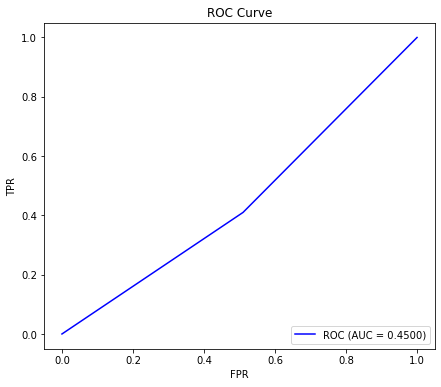

In [294]:
print_score(classifierOvRF, Xc_train, yc_train, X_test, Y_test, train=True)
print_score(classifierOvRF, Xc_train, yc_train, X_test, Y_test, train=False)
print(classification_report(Y_test,y_pred, digits = 3))

fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred)
auc_score = metrics.auc(fpr, tpr)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# Desicon Tree

In [86]:
#train

In [83]:
classifierOVD = DecisionTreeClassifier(criterion = 'entropy' , random_state = 0)
classifierOVD.fit(Xc_train,yc_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [84]:
#crossV

In [85]:
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro',
           'f1_macro': 'f1_macro' 
          ,'roc_auc' : 'roc_auc'}
scores = cross_validate(classifierOVD ,X_cv, y_cv ,scoring=scoring,
                         cv=10, return_train_score=False)


print(scores['test_acc'].mean())
print(scores['test_prec_macro'].mean())
print(scores['test_rec_micro'].mean())
print(scores['test_f1_macro'].mean())
print(scores['test_roc_auc'].mean())

0.9144239938935783
0.9145818555940839
0.9144233325664033
0.9144159862767175
0.9144233325664033


In [90]:
#test

In [86]:
y_pred = classifierOVD.predict(X_test)
classifierOVD.score(X_test,Y_test)

0.575

Train Result:
Accuracy Score: 99.98%
_______________________________________________
Classification Report:	Precision Score: 99.99%
			Recall Score: 99.98%
			F1 score: 99.98%
			AUC score: 99.98%
_______________________________________________
Confusion Matrix: 
 [[35378     4]
 [    7 35375]]

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     35382
           1      1.000     1.000     1.000     35382

    accuracy                          1.000     70764
   macro avg      1.000     1.000     1.000     70764
weighted avg      1.000     1.000     1.000     70764

Test Result:
Accuracy Score: 57.50%
_______________________________________________
Classification Report:	Precision Score: 54.10%
			Recall Score: 99.00%
			F1 score: 69.96%
			AUC score: 57.50%
_______________________________________________
Confusion Matrix: 
 [[ 32 168]
 [  2 198]]

              precision    recall  f1-score   support

           0      0.941     0.160

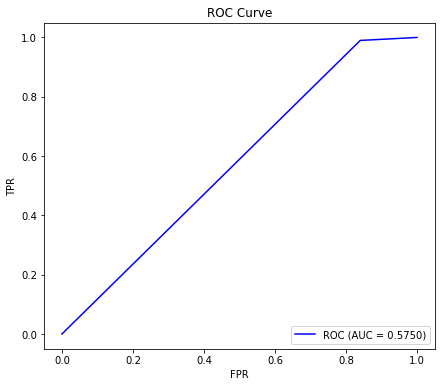

In [87]:
print_score(classifierOVD, Xc_train, yc_train, X_test, Y_test, train=True)
print_score(classifierOVD, Xc_train, yc_train, X_test, Y_test, train=False)
print(classification_report(Y_test,y_pred, digits = 3))

fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred)
auc_score = metrics.auc(fpr, tpr)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# SVM

In [88]:
#train

In [89]:
classifierOVS = SVC(kernel='rbf', random_state = 0)
classifierOVS.fit(Xc_train,yc_train)

SVC(random_state=0)

In [90]:
#crossV

In [91]:
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro',
           'f1_macro': 'f1_macro' 
          ,'roc_auc' : 'roc_auc'}
scores = cross_validate(classifierOVS ,X_cv, y_cv ,scoring=scoring,
                         cv=10, return_train_score=False)


print(scores['test_acc'].mean())
print(scores['test_prec_macro'].mean())
print(scores['test_rec_micro'].mean())
print(scores['test_f1_macro'].mean())
print(scores['test_roc_auc'].mean())

0.8382317565862802
0.8443801868612434
0.838232673773551
0.8375064067268909
0.9307270149568676


In [92]:
#test

In [93]:
Y_pred = classifierOVS.predict(X_test)
classifierOVS.score(X_test,Y_test)

0.5675

Train Result:
Accuracy Score: 86.17%
_______________________________________________
Classification Report:	Precision Score: 99.11%
			Recall Score: 72.99%
			F1 score: 84.07%
			AUC score: 86.17%
_______________________________________________
Confusion Matrix: 
 [[35150   232]
 [ 9557 25825]]

              precision    recall  f1-score   support

           0      0.786     0.993     0.878     35382
           1      0.991     0.730     0.841     35382

    accuracy                          0.862     70764
   macro avg      0.889     0.862     0.859     70764
weighted avg      0.889     0.862     0.859     70764

Test Result:
Accuracy Score: 56.75%
_______________________________________________
Classification Report:	Precision Score: 96.55%
			Recall Score: 14.00%
			F1 score: 24.45%
			AUC score: 56.75%
_______________________________________________
Confusion Matrix: 
 [[199   1]
 [172  28]]

              precision    recall  f1-score   support

           0      0.536     0.995

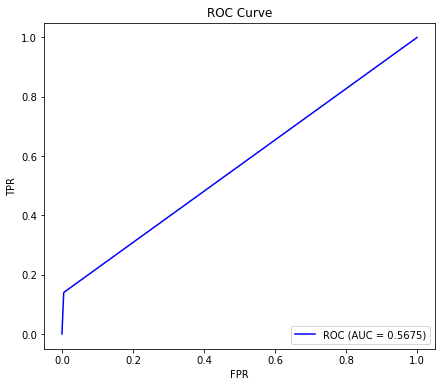

In [94]:
print_score(classifierOVS, Xc_train, yc_train, X_test, Y_test, train=True)
print_score(classifierOVS, Xc_train, yc_train, X_test, Y_test, train=False)
print(classification_report(Y_test,Y_pred, digits = 3))

fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred)
auc_score = metrics.auc(fpr, tpr)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# KNN

In [100]:
#train

In [101]:
classifierOVN = neighbors.KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm = 'brute')
classifierOVN.fit(Xc_train,yc_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=1)

In [102]:
#CrossV

In [103]:
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro',
           'f1_macro': 'f1_macro' 
          ,'roc_auc' : 'roc_auc'}
scores = cross_validate(classifierOVN ,X_cv, y_cv ,scoring=scoring,
                         cv=10, return_train_score=False)


print(scores['test_acc'].mean())
print(scores['test_prec_macro'].mean())
print(scores['test_rec_micro'].mean())
print(scores['test_f1_macro'].mean())
print(scores['test_roc_auc'].mean())

0.8919286327939115
0.8923228971128108
0.8919277424137844
0.8919015301412356
0.8919277424137843


In [104]:
#test

In [105]:
Y_pred = classifierOVN.predict(X_test)
classifierOVN

KNeighborsClassifier(algorithm='brute', n_neighbors=1)

Train Result:
Accuracy Score: 99.99%
_______________________________________________
Classification Report:	Precision Score: 99.99%
			Recall Score: 99.98%
			F1 score: 99.99%
			AUC score: 99.99%
_______________________________________________
Confusion Matrix: 
 [[35380     2]
 [    8 35374]]

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     35382
           1      1.000     1.000     1.000     35382

    accuracy                          1.000     70764
   macro avg      1.000     1.000     1.000     70764
weighted avg      1.000     1.000     1.000     70764

Test Result:
Accuracy Score: 66.00%
_______________________________________________
Classification Report:	Precision Score: 86.36%
			Recall Score: 38.00%
			F1 score: 52.78%
			AUC score: 66.00%
_______________________________________________
Confusion Matrix: 
 [[188  12]
 [124  76]]

              precision    recall  f1-score   support

           0      0.603     0.940

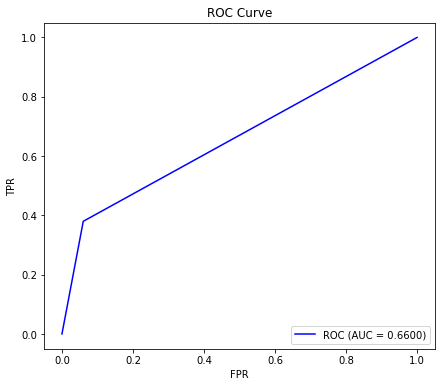

In [106]:
print_score(classifierOVN, Xc_train, yc_train, X_test, Y_test, train=True)
print_score(classifierOVN, Xc_train, yc_train, X_test, Y_test, train=False)
print(classification_report(Y_test,Y_pred, digits = 3))

fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred)
auc_score = metrics.auc(fpr, tpr)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# ANN

In [107]:
#train
annO = tf.keras.models.Sequential()
annO.add(tf.keras.layers.Dense(units = 16 , activation = 'relu' , input_dim = 24))
annO.add(tf.keras.layers.Dense(units = 16 , activation = 'relu'))
annO.add(tf.keras.layers.Dense(units = 1 , activation = 'sigmoid'))
annO.compile(optimizer ='adam' , loss = 'binary_crossentropy', metrics = ['accuracy'] )
annO.fit(Xc_train,yc_train , batch_size = 32, epochs = 30 )

Epoch 1/100
2212/2212 [==============================] - 5s 2ms/step - loss: 0.4865 - accuracy: 0.7330
Epoch 2/100
2212/2212 [==============================] - 4s 2ms/step - loss: 0.2336 - accuracy: 0.8775
Epoch 3/100
2212/2212 [==============================] - 3s 1ms/step - loss: 0.2163 - accuracy: 0.8871
Epoch 4/100
2212/2212 [==============================] - 3s 1ms/step - loss: 0.2117 - accuracy: 0.8893
Epoch 5/100
2212/2212 [==============================] - 3s 1ms/step - loss: 0.2098 - accuracy: 0.8897
Epoch 6/100
2212/2212 [==============================] - 4s 2ms/step - loss: 0.2055 - accuracy: 0.8928
Epoch 7/100
2212/2212 [==============================] - 4s 2ms/step - loss: 0.2022 - accuracy: 0.8943
Epoch 8/100
2212/2212 [==============================] - 4s 2ms/step - loss: 0.2021 - accuracy: 0.8913
Epoch 9/100
2212/2212 [==============================] - 3s 1ms/step - loss: 0.1973 - accuracy: 0.8964
Epoch 10/100
2212/2212 [==============================] - 3s 2ms/step - l

In [108]:
#CrossV
#CrossV
from keras.wrappers.scikit_learn import KerasClassifier
def create_network():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units = 16 , activation = 'relu' , input_dim = 24))
    model.add(tf.keras.layers.Dense(units = 16 , activation = 'relu'))
    model.add(tf.keras.layers.Dense(units = 1 , activation = 'sigmoid'))
    model.compile(optimizer ='adam' , loss = 'binary_crossentropy', metrics = ['accuracy'] )
    return model



network = KerasClassifier(build_fn=create_network, 
                                 epochs=30, 
                                 batch_size=32
                                 )
    
    
    
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro',
           'f1_macro': 'f1_macro' 
          ,'roc_auc' : 'roc_auc'}
scores = cross_validate(network ,X_cv, y_cv ,scoring=scoring,
                         cv=10, return_train_score=False)

    
    

In [109]:
print(scores['test_acc'].mean())
print(scores['test_prec_macro'].mean())
print(scores['test_rec_micro'].mean())
print(scores['test_f1_macro'].mean())
print(scores['test_roc_auc'].mean())

TypeError: Cannot clone object '<tensorflow.python.keras.engine.sequential.Sequential object at 0x0000021C0046F430>' (type <class 'tensorflow.python.keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [ ]:
#test

Train Result:
Accuracy Score: 90.62%
_______________________________________________
Classification Report:	Precision Score: 93.50%
			Recall Score: 87.30%
			F1 score: 90.29%
			AUC score: 90.62%
_______________________________________________
Confusion Matrix: 
 [[33236  2146]
 [ 4494 30888]]

              precision    recall  f1-score   support

           0      0.881     0.939     0.909     35382
           1      0.935     0.873     0.903     35382

    accuracy                          0.906     70764
   macro avg      0.908     0.906     0.906     70764
weighted avg      0.908     0.906     0.906     70764

Test Result:
Accuracy Score: 68.25%
_______________________________________________
Classification Report:	Precision Score: 61.81%
			Recall Score: 95.50%
			F1 score: 75.05%
			AUC score: 68.25%
_______________________________________________
Confusion Matrix: 
 [[ 82 118]
 [  9 191]]

              precision    recall  f1-score   support

           0      0.901     0.410

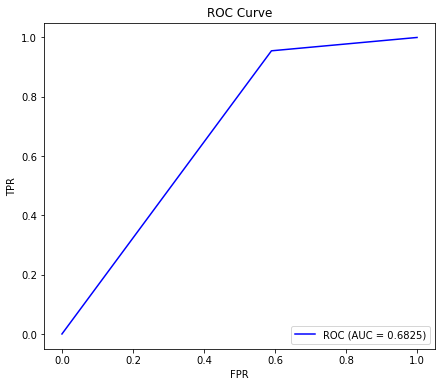

In [111]:
print_scoreN(annO, Xc_train,yc_train, X_test,Y_test, train=True)
print_scoreN(annO, Xc_train,yc_train, X_test,Y_test, train=False)

y_pred = annO.predict(X_test)
y_pred = (y_pred > 0.5)
print(classification_report(Y_test,y_pred, digits = 3))
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred)
auc_score = metrics.auc(fpr, tpr)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# XGboot

In [112]:
#train 
classifierOXG = XGBClassifier()
classifierOXG.fit(Xc_train,yc_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [113]:
#crossV
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro',
           'f1_macro': 'f1_macro' 
          ,'roc_auc' : 'roc_auc'}
scores = cross_validate(classifierOXG ,X_cv, y_cv ,scoring=scoring,
                         cv=10, return_train_score=False)


print(scores['test_acc'].mean())
print(scores['test_prec_macro'].mean())
print(scores['test_rec_micro'].mean())
print(scores['test_f1_macro'].mean())
print(scores['test_roc_auc'].mean())

0.9355643170357026
0.9372471526860593
0.9355647800189175
0.9355021912568148
0.9848142129456914


In [114]:
#test

In [115]:
y_pred = classifierOXG.predict(X_test)
classifierOXG.score(X_test,Y_test)

0.7025

Train Result:
Accuracy Score: 95.84%
_______________________________________________
Classification Report:	Precision Score: 98.45%
			Recall Score: 93.15%
			F1 score: 95.73%
			AUC score: 95.84%
_______________________________________________
Confusion Matrix: 
 [[34864   518]
 [ 2424 32958]]

              precision    recall  f1-score   support

           0      0.935     0.985     0.960     35382
           1      0.985     0.931     0.957     35382

    accuracy                          0.958     70764
   macro avg      0.960     0.958     0.958     70764
weighted avg      0.960     0.958     0.958     70764

Test Result:
Accuracy Score: 70.25%
_______________________________________________
Classification Report:	Precision Score: 62.70%
			Recall Score: 100.00%
			F1 score: 77.07%
			AUC score: 70.25%
_______________________________________________
Confusion Matrix: 
 [[ 81 119]
 [  0 200]]

              precision    recall  f1-score   support

           0      1.000     0.40

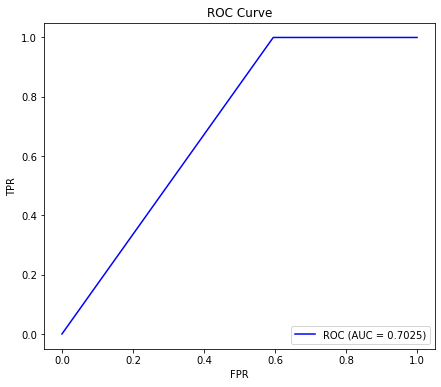

In [116]:
print_score(classifierOXG, Xc_train, yc_train, X_test, Y_test, train=True)
print_score(classifierOXG, Xc_train, yc_train, X_test, Y_test, train=False)
print(classification_report(Y_test,y_pred, digits = 3))

fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred)
auc_score = metrics.auc(fpr, tpr)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

#### Split for imbalace data

In [117]:
Xc_train, X_cv, yc_train, y_cv = train_test_split(X_train, Y_train, test_size=0.2 , random_state=3, stratify = Y_train )

# RF

In [118]:
#train
classifierURF = RandomForestClassifier(n_estimators = 80 ,criterion = 'entropy' , random_state = 0)
classifierURF.fit(Xc_train,yc_train)

RandomForestClassifier(criterion='entropy', n_estimators=80, random_state=0)

In [119]:
#crossV

In [120]:
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro',
           'f1_macro': 'f1_macro' 
          ,'roc_auc' : 'roc_auc'}
scores = cross_validate(classifierURF ,X_cv, y_cv ,scoring=scoring,
                         cv=10, return_train_score=False)


print(scores['test_acc'].mean())
print(scores['test_prec_macro'].mean())
print(scores['test_rec_micro'].mean())
print(scores['test_f1_macro'].mean())
print(scores['test_roc_auc'].mean())

0.9323459809695448
0.8937272994955545
0.6123141786653334
0.6612865671036048
0.8791528584553399


In [121]:
#test

In [122]:
y_pred = classifierURF.predict(X_test)
classifierURF.score(X_test,Y_test)

0.5

Train Result:
Accuracy Score: 99.97%
_______________________________________________
Classification Report:	Precision Score: 99.97%
			Recall Score: 99.66%
			F1 score: 99.81%
			AUC score: 99.83%
_______________________________________________
Confusion Matrix: 
 [[35381     1]
 [   11  3215]]

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     35382
           1      1.000     0.997     0.998      3226

    accuracy                          1.000     38608
   macro avg      1.000     0.998     0.999     38608
weighted avg      1.000     1.000     1.000     38608

Test Result:
Accuracy Score: 50.00%
_______________________________________________
Classification Report:	Precision Score: 0.00%
			Recall Score: 0.00%
			F1 score: 0.00%
			AUC score: 50.00%
_______________________________________________
Confusion Matrix: 
 [[200   0]
 [200   0]]

              precision    recall  f1-score   support

           0      0.500     1.000   

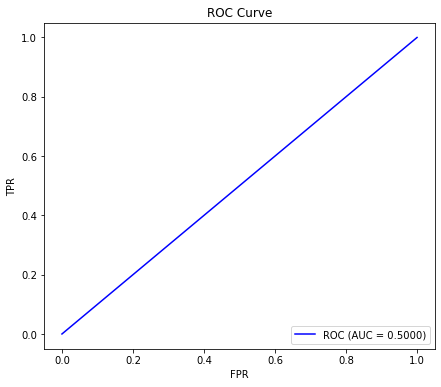

In [123]:
print_score(classifierURF, Xc_train, yc_train, X_test, Y_test, train=True)
print_score(classifierURF, Xc_train, yc_train, X_test, Y_test, train=False)
print(classification_report(Y_test,y_pred, digits = 3))
#AUC
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred)
auc_score = metrics.auc(fpr, tpr)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# DT

In [124]:
#train
classifierUD = DecisionTreeClassifier(criterion = 'entropy' , random_state = 0)
classifierUD.fit(Xc_train,yc_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [125]:
#crossV
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro',
           'f1_macro': 'f1_macro' 
          ,'roc_auc' : 'roc_auc'}
scores = cross_validate(classifierUD ,X_cv, y_cv ,scoring=scoring,
                         cv=10, return_train_score=False)


print(scores['test_acc'].mean())
print(scores['test_prec_macro'].mean())
print(scores['test_rec_micro'].mean())
print(scores['test_f1_macro'].mean())
print(scores['test_roc_auc'].mean())

0.8991917956639742
0.6750656767299908
0.6855792729835186
0.6798959799324831
0.6855792729835186


In [126]:
#test
y_pred = classifierUD.predict(X_test)
classifierUD.score(X_test,Y_test)

0.57

Train Result:
Accuracy Score: 99.98%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 99.81%
			F1 score: 99.91%
			AUC score: 99.91%
_______________________________________________
Confusion Matrix: 
 [[35382     0]
 [    6  3220]]

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     35382
           1      1.000     0.998     0.999      3226

    accuracy                          1.000     38608
   macro avg      1.000     0.999     0.999     38608
weighted avg      1.000     1.000     1.000     38608

Test Result:
Accuracy Score: 57.00%
_______________________________________________
Classification Report:	Precision Score: 68.92%
			Recall Score: 25.50%
			F1 score: 37.23%
			AUC score: 57.00%
_______________________________________________
Confusion Matrix: 
 [[177  23]
 [149  51]]

              precision    recall  f1-score   support

           0      0.543     0.88

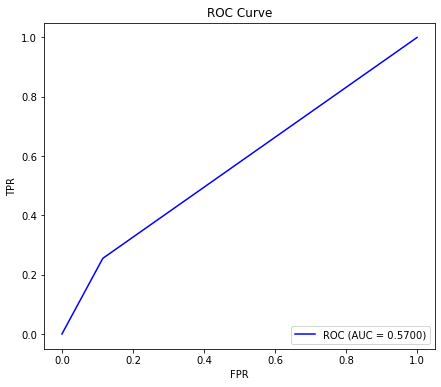

In [127]:
print_score(classifierUD, Xc_train, yc_train, X_test, Y_test, train=True)
print_score(classifierUD, Xc_train, yc_train, X_test, Y_test, train=False)
print(classification_report(Y_test,y_pred, digits = 3))

fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred)
auc_score = metrics.auc(fpr, tpr)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# SVM

In [128]:
#train
classifierUS = SVC(kernel='rbf', random_state = 0)
classifierUS.fit(Xc_train,yc_train)

SVC(random_state=0)

In [129]:
#crossV
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro',
           'f1_macro': 'f1_macro' 
          ,'roc_auc' : 'roc_auc'}
scores = cross_validate(classifierUS ,X_cv, y_cv ,scoring=scoring,
                         cv=10, return_train_score=False)


print(scores['test_acc'].mean())
print(scores['test_prec_macro'].mean())
print(scores['test_rec_micro'].mean())
print(scores['test_f1_macro'].mean())
print(scores['test_roc_auc'].mean())

0.9164940623692596
0.4582470311846298
0.5
0.478213845686631
0.6958644440215284


In [130]:
#test
y_pred = classifierUS.predict(X_test)
classifierUS.score(X_test,Y_test)

0.5

Train Result:
Accuracy Score: 91.64%
_______________________________________________
Classification Report:	Precision Score: 0.00%
			Recall Score: 0.00%
			F1 score: 0.00%
			AUC score: 50.00%
_______________________________________________
Confusion Matrix: 
 [[35382     0]
 [ 3226     0]]

              precision    recall  f1-score   support

           0      0.916     1.000     0.956     35382
           1      0.000     0.000     0.000      3226

    accuracy                          0.916     38608
   macro avg      0.458     0.500     0.478     38608
weighted avg      0.840     0.916     0.876     38608

Test Result:
Accuracy Score: 50.00%
_______________________________________________
Classification Report:	Precision Score: 0.00%
			Recall Score: 0.00%
			F1 score: 0.00%
			AUC score: 50.00%
_______________________________________________
Confusion Matrix: 
 [[200   0]
 [200   0]]

              precision    recall  f1-score   support

           0      0.500     1.000     0

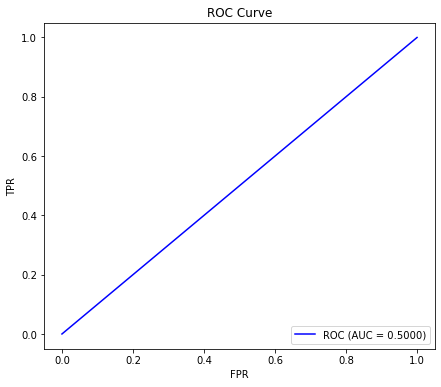

In [131]:
print_score(classifierUS, Xc_train, yc_train, X_test, Y_test, train=True)
print_score(classifierUS, Xc_train, yc_train, X_test, Y_test, train=False)
print(classification_report(Y_test,y_pred, digits = 3))

fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred)
auc_score = metrics.auc(fpr, tpr)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# KNN

In [132]:
#train
classifierUN = neighbors.KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm = 'brute')
classifierUN.fit(Xc_train,yc_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=1)

In [133]:
#crossV
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro',
           'f1_macro': 'f1_macro' 
          ,'roc_auc' : 'roc_auc'}
scores = cross_validate(classifierUN ,X_cv, y_cv ,scoring=scoring,
                         cv=10, return_train_score=False)


print(scores['test_acc'].mean())
print(scores['test_prec_macro'].mean())
print(scores['test_rec_micro'].mean())
print(scores['test_f1_macro'].mean())
print(scores['test_roc_auc'].mean())

0.8760853474077173
0.5717778131234297
0.5602807514067484
0.5646973252443279
0.5602807514067484


In [134]:
#test
y_pred = classifierUN.predict(X_test)
classifierUN.score(X_test,Y_test)

0.5

Train Result:
Accuracy Score: 99.98%
_______________________________________________
Classification Report:	Precision Score: 99.88%
			Recall Score: 99.94%
			F1 score: 99.91%
			AUC score: 99.96%
_______________________________________________
Confusion Matrix: 
 [[35378     4]
 [    2  3224]]

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     35382
           1      0.999     0.999     0.999      3226

    accuracy                          1.000     38608
   macro avg      0.999     1.000     0.999     38608
weighted avg      1.000     1.000     1.000     38608

Test Result:
Accuracy Score: 50.00%
_______________________________________________
Classification Report:	Precision Score: 0.00%
			Recall Score: 0.00%
			F1 score: 0.00%
			AUC score: 50.00%
_______________________________________________
Confusion Matrix: 
 [[200   0]
 [200   0]]

              precision    recall  f1-score   support

           0      0.500     1.000   

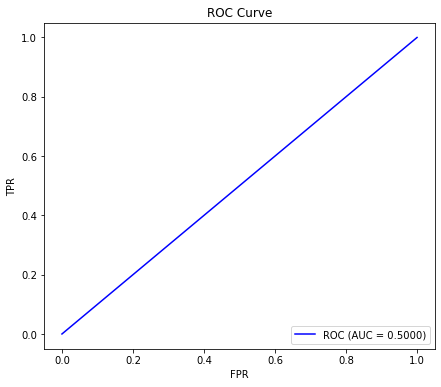

In [135]:
print_score(classifierUN, Xc_train, yc_train, X_test, Y_test, train=True)
print_score(classifierUN, Xc_train, yc_train, X_test, Y_test, train=False)
print(classification_report(Y_test,y_pred, digits = 3))

fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred)
auc_score = metrics.auc(fpr, tpr)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# ANN

In [136]:
#train
annU = tf.keras.models.Sequential()
annU.add(tf.keras.layers.Dense(units = 16 , activation = 'relu' , input_dim = 24))
annU.add(tf.keras.layers.Dense(units = 16 , activation = 'relu'))
annU.add(tf.keras.layers.Dense(units = 1 , activation = 'sigmoid'))
annU.compile(optimizer ='adam' , loss = 'binary_crossentropy', metrics = ['accuracy'] )
annU.fit(Xc_train,yc_train , batch_size = 32, epochs = 30 )

Epoch 1/100
1207/1207 [==============================] - 4s 2ms/step - loss: 0.3662 - accuracy: 0.9158
Epoch 2/100
1207/1207 [==============================] - 2s 2ms/step - loss: 0.2693 - accuracy: 0.9160
Epoch 3/100
1207/1207 [==============================] - 2s 2ms/step - loss: 0.2590 - accuracy: 0.9164
Epoch 4/100
1207/1207 [==============================] - 2s 2ms/step - loss: 0.2502 - accuracy: 0.9174
Epoch 5/100
1207/1207 [==============================] - 2s 2ms/step - loss: 0.2463 - accuracy: 0.9192
Epoch 6/100
1207/1207 [==============================] - 3s 2ms/step - loss: 0.2414 - accuracy: 0.9194
Epoch 7/100
1207/1207 [==============================] - 2s 2ms/step - loss: 0.2425 - accuracy: 0.9172
Epoch 8/100
1207/1207 [==============================] - 2s 1ms/step - loss: 0.2310 - accuracy: 0.9231
Epoch 9/100
1207/1207 [==============================] - 2s 2ms/step - loss: 0.2316 - accuracy: 0.9225
Epoch 10/100
1207/1207 [==============================] - 2s 2ms/step - l

In [137]:
#CrossV
from keras.wrappers.scikit_learn import KerasClassifier
def create_network():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units = 16 , activation = 'relu' , input_dim = 24))
    model.add(tf.keras.layers.Dense(units = 16 , activation = 'relu'))
    model.add(tf.keras.layers.Dense(units = 1 , activation = 'sigmoid'))
    model.compile(optimizer ='adam' , loss = 'binary_crossentropy', metrics = ['accuracy'] )
    return model



network = KerasClassifier(build_fn=create_network, 
                                 epochs=30, 
                                 batch_size=32
                                 )
    
    
    
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro',
           'f1_macro': 'f1_macro' 
          ,'roc_auc' : 'roc_auc'}
scores = cross_validate(network ,X_cv, y_cv ,scoring=scoring,
                         cv=10, return_train_score=False)

    
    

In [138]:
print(scores['test_acc'].mean())
print(scores['test_prec_macro'].mean())
print(scores['test_rec_micro'].mean())
print(scores['test_f1_macro'].mean())
print(scores['test_roc_auc'].mean())

TypeError: Cannot clone object '<tensorflow.python.keras.engine.sequential.Sequential object at 0x0000021C1F3DA880>' (type <class 'tensorflow.python.keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [ ]:
#test
print_scoreN(annU, Xc_train,yc_train, X_test,Y_test, train=True)
print_scoreN(annU, Xc_train,yc_train, X_test,Y_test, train=False)

y_pred = annU.predict(X_test)
y_pred = (y_pred > 0.5)
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred)
auc_score = metrics.auc(fpr, tpr)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# XGboost

In [ ]:
#train 
classifierUXG = XGBClassifier()
classifierUXG.fit(Xc_train,yc_train)

In [ ]:
#crossV
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro',
           'f1_macro': 'f1_macro' 
          ,'roc_auc' : 'roc_auc'}
scores = cross_validate(classifierUXG ,X_cv, y_cv ,scoring=scoring,
                         cv=10, return_train_score=False)


print(scores['test_acc'].mean())
print(scores['test_prec_macro'].mean())
print(scores['test_rec_micro'].mean())
print(scores['test_f1_macro'].mean())
print(scores['test_roc_auc'].mean())

In [ ]:
#test
y_pred = classifierUXG.predict(X_test)
classifierUXG.score(X_test,Y_test)

In [ ]:
print_score(classifierUXG, Xc_train, yc_train, X_test, Y_test, train=True)
print_score(classifierUXG, Xc_train, yc_train, X_test, Y_test, train=False)
print(classification_report(Y_test,y_pred, digits = 3))

fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred)
auc_score = metrics.auc(fpr, tpr)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

#### Split for under-sample

In [ ]:
Xc_train, X_cv, yc_train, y_cv = train_test_split(X_tl, y_tl, test_size=0.2 , random_state=3 , stratify = y_tl)

# RF

In [ ]:
classifierUNRF = RandomForestClassifier(n_estimators = 80 ,criterion = 'entropy' , random_state = 0)
classifierUNRF.fit(Xc_train,yc_train)

In [ ]:
#crossV

#crossV
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro',
           'f1_macro': 'f1_macro' 
          ,'roc_auc' : 'roc_auc'}
scores = cross_validate(classifierUNRF ,X_cv, y_cv ,scoring=scoring,
                         cv=10, return_train_score=False)


print(scores['test_acc'].mean())
print(scores['test_prec_macro'].mean())
print(scores['test_rec_micro'].mean())
print(scores['test_f1_macro'].mean())
print(scores['test_roc_auc'].mean())

In [ ]:
#test

In [ ]:
y_pred = classifierUNRF.predict(X_test)
classifierUNRF.score(X_test,Y_test)

In [ ]:
print_score(classifierUNRF, Xc_train, yc_train, X_test, Y_test, train=True)
print_score(classifierUNRF, Xc_train, yc_train, X_test, Y_test, train=False)
print(classification_report(Y_test,y_pred, digits = 3))
#AUC
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred)
auc_score = metrics.auc(fpr, tpr)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# DT

In [ ]:
#train
classifierUND = DecisionTreeClassifier(criterion = 'entropy' , random_state = 0)
classifierUND.fit(Xc_train,yc_train)

In [ ]:
#crossV
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro',
           'f1_macro': 'f1_macro' 
          ,'roc_auc' : 'roc_auc'}
scores = cross_validate(classifierUND ,X_cv, y_cv ,scoring=scoring,
                         cv=10, return_train_score=False)


print(scores['test_acc'].mean())
print(scores['test_prec_macro'].mean())
print(scores['test_rec_micro'].mean())
print(scores['test_f1_macro'].mean())
print(scores['test_roc_auc'].mean())

In [ ]:
#test
y_pred = classifierUND.predict(X_test)
classifierUND.score(X_test,Y_test)

In [ ]:
print_score(classifierUND, Xc_train, yc_train, X_test, Y_test, train=True)
print_score(classifierUND, Xc_train, yc_train, X_test, Y_test, train=False)
print(classification_report(Y_test,y_pred, digits = 3))
#AUC
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred)
auc_score = metrics.auc(fpr, tpr)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# SVM

In [ ]:
#train
classifierUNS = SVC(kernel='rbf', random_state = 0)
classifierUNS.fit(Xc_train,yc_train)

In [ ]:
#crossV
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro',
           'f1_macro': 'f1_macro' 
          ,'roc_auc' : 'roc_auc'}
scores = cross_validate(classifierUNS ,X_cv, y_cv ,scoring=scoring,
                         cv=10, return_train_score=False)


print(scores['test_acc'].mean())
print(scores['test_prec_macro'].mean())
print(scores['test_rec_micro'].mean())
print(scores['test_f1_macro'].mean())
print(scores['test_roc_auc'].mean())

In [ ]:
#test
y_pred = classifierUNS.predict(X_test)
classifierUNS.score(X_test,Y_test)

In [ ]:
print_score(classifierUNS, Xc_train, yc_train, X_test, Y_test, train=True)
print_score(classifierUNS, Xc_train, yc_train, X_test, Y_test, train=False)
print(classification_report(Y_test,y_pred, digits = 3))

fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred)
auc_score = metrics.auc(fpr, tpr)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# KNN

In [ ]:
#train
classifierUNN = neighbors.KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm = 'brute')
classifierUNN.fit(Xc_train,yc_train)

In [ ]:
#crossV
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro',
           'f1_macro': 'f1_macro' 
          ,'roc_auc' : 'roc_auc'}
scores = cross_validate(classifierUNN ,X_cv, y_cv ,scoring=scoring,
                         cv=10, return_train_score=False)


print(scores['test_acc'].mean())
print(scores['test_prec_macro'].mean())
print(scores['test_rec_micro'].mean())
print(scores['test_f1_macro'].mean())
print(scores['test_roc_auc'].mean())

In [ ]:
#test
y_pred = classifierUNN.predict(X_test)
classifierUNN.score(X_test,Y_test)

In [ ]:
print_score(classifierUNN, Xc_train, yc_train, X_test, Y_test, train=True)
print_score(classifierUNN, Xc_train, yc_train, X_test, Y_test, train=False)
print(classification_report(Y_test,y_pred, digits = 3))

fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred)
auc_score = metrics.auc(fpr, tpr)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# ANN

In [ ]:
#train
annUN = tf.keras.models.Sequential()
annUN.add(tf.keras.layers.Dense(units = 16 , activation = 'relu' , input_dim = 24))
annUN.add(tf.keras.layers.Dense(units = 16 , activation = 'relu'))
annUN.add(tf.keras.layers.Dense(units = 1 , activation = 'sigmoid'))
annUN.compile(optimizer ='adam' , loss = 'binary_crossentropy', metrics = ['accuracy'] )
annUN.fit(Xc_train,yc_train , batch_size = 32, epochs = 30 )

In [ ]:
#CrossV
from keras.wrappers.scikit_learn import KerasClassifier
def create_network():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units = 16 , activation = 'relu' , input_dim = 24))
    model.add(tf.keras.layers.Dense(units = 16 , activation = 'relu'))
    model.add(tf.keras.layers.Dense(units = 1 , activation = 'sigmoid'))
    model.compile(optimizer ='adam' , loss = 'binary_crossentropy', metrics = ['accuracy'] )
    return model



network = KerasClassifier(build_fn=create_network, 
                                 epochs=30, 
                                 batch_size=32
                                 )
    
    
    
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro',
           'f1_macro': 'f1_macro' 
          ,'roc_auc' : 'roc_auc'}
scores = cross_validate(network ,X_cv, y_cv ,scoring=scoring,
                         cv=10, return_train_score=False)

    
    

In [ ]:
print(scores['test_acc'].mean())
print(scores['test_prec_macro'].mean())
print(scores['test_rec_micro'].mean())
print(scores['test_f1_macro'].mean())
print(scores['test_roc_auc'].mean())

In [ ]:
#test
print_scoreN(annUN, Xc_train,yc_train, X_test,Y_test, train=True)
print_scoreN(annUN, Xc_train,yc_train, X_test,Y_test, train=False)

y_pred = annUN.predict(X_test)
y_pred = (y_pred > 0.5)
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred)
auc_score = metrics.auc(fpr, tpr)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# XGboost

In [ ]:
#train 
classifierUNXG = XGBClassifier()
classifierUNXG.fit(Xc_train,yc_train)

In [ ]:
#crossV
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro',
           'f1_macro': 'f1_macro' 
          ,'roc_auc' : 'roc_auc'}
scores = cross_validate(classifierUNXG ,X_cv, y_cv ,scoring=scoring,
                         cv=10, return_train_score=False)


print(scores['test_acc'].mean())
print(scores['test_prec_macro'].mean())
print(scores['test_rec_micro'].mean())
print(scores['test_f1_macro'].mean())
print(scores['test_roc_auc'].mean())

In [ ]:
#test
y_pred = classifierUNXG.predict(X_test)
classifierUNXG.score(X_test,Y_test)

In [ ]:
print_score(classifierUNXG, Xc_train, yc_train, X_test, Y_test, train=True)
print_score(classifierUNXG, Xc_train, yc_train, X_test, Y_test, train=False)
print(classification_report(Y_test,y_pred, digits = 3))

fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred)
auc_score = metrics.auc(fpr, tpr)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

#### split for under and over sample

In [ ]:
Xc_train, X_cv, yc_train, y_cv = train_test_split(x_SMtl, y_SMtl, test_size=0.2 , random_state=3 , stratify = y_SMtl)

# RF

In [ ]:
#train
classifierOURF = RandomForestClassifier(n_estimators = 90 ,criterion = 'entropy' , random_state = 0)
classifierOURF .fit(Xc_train,yc_train)

In [ ]:
#crossV
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro',
           'f1_macro': 'f1_macro' 
          ,'roc_auc' : 'roc_auc'}
scores = cross_validate(classifierOURF ,X_cv, y_cv ,scoring=scoring,
                         cv=10, return_train_score=False)


print(scores['test_acc'].mean())
print(scores['test_prec_macro'].mean())
print(scores['test_rec_micro'].mean())
print(scores['test_f1_macro'].mean())
print(scores['test_roc_auc'].mean())

In [ ]:
#test
y_pred = classifierOURF .predict(X_test)
classifierOURF .score(X_test,Y_test)

In [ ]:
print_score(classifierOURF, Xc_train, yc_train, X_test, Y_test, train=True)
print_score(classifierOURF, Xc_train, yc_train, X_test, Y_test, train=False)
print(classification_report(Y_test,y_pred, digits = 3))

fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred)
auc_score = metrics.auc(fpr, tpr)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# DT

In [ ]:
#train
classifierOUD = DecisionTreeClassifier(criterion = 'entropy' , random_state = 0)
classifierOUD.fit(Xc_train,yc_train)

In [ ]:
#crossV
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro',
           'f1_macro': 'f1_macro' 
          ,'roc_auc' : 'roc_auc'}
scores = cross_validate(classifierOUD ,X_cv, y_cv ,scoring=scoring,
                         cv=10, return_train_score=False)


print(scores['test_acc'].mean())
print(scores['test_prec_macro'].mean())
print(scores['test_rec_micro'].mean())
print(scores['test_f1_macro'].mean())
print(scores['test_roc_auc'].mean())

In [ ]:
#test
y_pred = classifierOUD.predict(X_test)
classifierOUD.score(X_test,Y_test)

In [ ]:
print_score(classifierOUD, Xc_train, yc_train, X_test, Y_test, train=True)
print_score(classifierOUD, Xc_train, yc_train, X_test, Y_test, train=False)
print(classification_report(Y_test,y_pred, digits = 3))

fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred)
auc_score = metrics.auc(fpr, tpr)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# SVM

In [ ]:
#train
classifierOUS = SVC(kernel='rbf', random_state = 0)
classifierOUS.fit(Xc_train,yc_train)

In [ ]:
#crossV
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro',
           'f1_macro': 'f1_macro' 
          ,'roc_auc' : 'roc_auc'}
scores = cross_validate(classifierOUS ,X_cv, y_cv ,scoring=scoring,
                         cv=10, return_train_score=False)


print(scores['test_acc'].mean())
print(scores['test_prec_macro'].mean())
print(scores['test_rec_micro'].mean())
print(scores['test_f1_macro'].mean())
print(scores['test_roc_auc'].mean())

In [ ]:
#test
y_pred = classifierOUS.predict(X_test)
classifierOUS.score(X_test,Y_test)

In [ ]:
print_score(classifierOUS, Xc_train, yc_train, X_test, Y_test, train=True)
print_score(classifierOUS, Xc_train, yc_train, X_test, Y_test, train=False)
print(classification_report(Y_test,y_pred, digits = 3))

fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred)
auc_score = metrics.auc(fpr, tpr)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# KNN

In [ ]:
#train
classifierOUN = neighbors.KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm = 'brute')
classifierOUN.fit(Xc_train,yc_train)

In [ ]:
#crossV
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro',
           'f1_macro': 'f1_macro' 
          ,'roc_auc' : 'roc_auc'}
scores = cross_validate(classifierOUN ,X_cv, y_cv ,scoring=scoring,
                         cv=10, return_train_score=False)


print(scores['test_acc'].mean())
print(scores['test_prec_macro'].mean())
print(scores['test_rec_micro'].mean())
print(scores['test_f1_macro'].mean())
print(scores['test_roc_auc'].mean())

In [ ]:
#test
y_pred = classifierOUN.predict(X_test)
classifierOUN.score(X_test,Y_test)

In [ ]:
print_score(classifierOUN, Xc_train, yc_train, X_test, Y_test, train=True)
print_score(classifierOUN, Xc_train, yc_train, X_test, Y_test, train=False)
print(classification_report(Y_test,y_pred, digits = 3))

fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred)
auc_score = metrics.auc(fpr, tpr)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# ANN

In [ ]:
#train
annO = tf.keras.models.Sequential()
annO.add(tf.keras.layers.Dense(units = 16 , activation = 'relu' , input_dim = 24))
annO.add(tf.keras.layers.Dense(units = 16 , activation = 'relu'))
annO.add(tf.keras.layers.Dense(units = 1 , activation = 'sigmoid'))
annO.compile(optimizer ='adam' , loss = 'binary_crossentropy', metrics = ['accuracy'] )
annO.fit(Xc_train,yc_train , batch_size = 32, epochs = 30 )

In [ ]:
#CrossV
from keras.wrappers.scikit_learn import KerasClassifier
def create_network():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units = 16 , activation = 'relu' , input_dim = 24))
    model.add(tf.keras.layers.Dense(units = 16 , activation = 'relu'))
    model.add(tf.keras.layers.Dense(units = 1 , activation = 'sigmoid'))
    model.compile(optimizer ='adam' , loss = 'binary_crossentropy', metrics = ['accuracy'] )
    return model



network = KerasClassifier(build_fn=create_network, 
                                 epochs=30, 
                                 batch_size=32
                                 )
    
    
    
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro',
           'f1_macro': 'f1_macro' 
          ,'roc_auc' : 'roc_auc'}
scores = cross_validate(network ,X_cv, y_cv ,scoring=scoring,
                         cv=10, return_train_score=False)

    
    

In [ ]:
print(scores['test_acc'].mean())
print(scores['test_prec_macro'].mean())
print(scores['test_rec_micro'].mean())
print(scores['test_f1_macro'].mean())
print(scores['test_roc_auc'].mean())

In [ ]:
#test
print_scoreN(annO, Xc_train,yc_train, X_test,Y_test, train=True)
print_scoreN(annO, Xc_train,yc_train, X_test,Y_test, train=False)

y_pred = annO.predict(X_test)
y_pred = (y_pred > 0.5)
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred)
auc_score = metrics.auc(fpr, tpr)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# XGboost

In [ ]:
#train 
classifierUXG = XGBClassifier()
classifierUXG.fit(Xc_train,yc_train)

In [ ]:
#crossV
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro',
           'f1_macro': 'f1_macro' 
          ,'roc_auc' : 'roc_auc'}
scores = cross_validate(classifierUXG ,X_cv, y_cv ,scoring=scoring,
                         cv=10, return_train_score=False)


print(scores['test_acc'].mean())
print(scores['test_prec_macro'].mean())
print(scores['test_rec_micro'].mean())
print(scores['test_f1_macro'].mean())
print(scores['test_roc_auc'].mean())

In [ ]:
#test
y_pred = classifierUXG.predict(X_test)
classifierUXG.score(X_test,Y_test)

In [ ]:
print_score(classifierUXG, Xc_train, yc_train, X_test, Y_test, train=True)
print_score(classifierUXG, Xc_train, yc_train, X_test, Y_test, train=False)
print(classification_report(Y_test,y_pred, digits = 3))

fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred)
auc_score = metrics.auc(fpr, tpr)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# The END EXP1

In [ ]:
# solve it to visulation

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sca.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sca.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
#showing the RF

In [ ]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,6), dpi=800)
tree.plot_tree(classifier.estimators_[0],
               max_depth = 3 ,
               feature_names = X.columns.values, 
               class_names= ['No', 'Yes'],
               filled = True);
fig.savefig('rf_individualtree.png')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(t_SM, u_SM, test_size=0.3 , random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 30 , criterion = 'entropy' , random_state = 0)
classifier.fit(X_train,y_train)

In [ ]:
y_pred = classifier.predict(X_test)
classifier.score(X_test,y_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

In [ ]:
8427/13349

In [ ]:
11095 /13308

# SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 0)
classifier.fit(X_train,y_train)

In [ ]:
Y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,Y_pred))
print(classification_report(y_test,Y_pred))

In [ ]:
print_score(classifier, X_train, y_train, X_test, y_test, train=True)
print_score(classifier, X_train, y_train, X_test, y_test, train=False)

# Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_SM, y_SM, test_size=0.2 , random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25 , random_state=1)

In [ ]:
classifierD = DecisionTreeClassifier(criterion = 'entropy' , random_state = 0)

In [ ]:
classifierD.fit(X_train,y_train)

In [ ]:
#val

In [ ]:
y_pred = classifierD.predict(X_val)
classifierD.score(X_val,y_val)

In [ ]:
print_score(classifierD, X_train, y_train, X_val, y_val, train=True)
print_score(classifierD, X_train, y_train, X_val, y_val, train=False)

In [ ]:
y_pred = classifierD.predict(X_test)
classifierD.score(X_test,y_test)

In [ ]:
print_score(classifierD, X_train, y_train, X_test, y_test, train=True)
print_score(classifierD, X_train, y_train, X_test, y_test, train=False)

# over and under

# artifichal neural network

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units = 8 , activation = 'relu' , input_dim = 24))

In [ ]:
ann.add(tf.keras.layers.Dense(units = 8 , activation = 'relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units = 1 , activation = 'sigmoid'))

In [ ]:
ann.compile(optimizer ='adam' , loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [ ]:
ann.fit(X_train, y_train , batch_size = 32 , epochs = 100  )

In [ ]:
pre = 

In [ ]:
print_scoreN(ann, X_train, y_train, X_test, y_test, train=True)
print_scoreN(ann, X_train, y_train, X_test, y_test, train=False)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_scoreN(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        pred = (pred > 0.5)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        pred = (pred > 0.5)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

# Exp 2 

In [ ]:
 = df.sample(1000).index